In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = [[828, 920, 1234567, 1020, 1111],
            [824, 910, 2345612, 1090, 1234],
            [880, 900, 3456123, 1010, 1000],
            [870, 990, 2312123, 1001, 1122],
            [860, 980, 3223123, 1008, 1133],
            [850, 970, 2432123, 1100, 1221]]
data = np.float32(data)

In [4]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,828.0,920.0,1234567.0,1020.0,1111.0
1,824.0,910.0,2345612.0,1090.0,1234.0
2,880.0,900.0,3456123.0,1010.0,1000.0
3,870.0,990.0,2312123.0,1001.0,1122.0
4,860.0,980.0,3223123.0,1008.0,1133.0
5,850.0,970.0,2432123.0,1100.0,1221.0


# 왜 preprocessing을 해야하는가?

- scaling을 하지 않으면 발산을 하기 쉬움. lr와 비슷한 이유. 
- 이를 해결하기 위해서는 1) 단위가 크면 lr을 낮게 둬야 함. 2) scaling을 한다.
- 일반적으로는 정규화를 통해서 단위를 맞춘다.

- 일반적으로 y 값에는 scaling을 하지 않아도 된다.

# Minmax scaler

$x_{new} = \frac{x-x_{min}}{x_{max}-m_{min}}$


In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,[-1]]
scaler = MinMaxScaler()
# fit_transform하는 대상이 항상 matrix여야 함.
x_scalered = scaler.fit_transform(x)


In [6]:
x_scalered

array([[0.0714283 , 0.22222233, 0.        , 0.19191933],
       [0.        , 0.11111164, 0.50012016, 0.89899063],
       [1.        , 0.        , 1.        , 0.09090996],
       [0.8214283 , 1.        , 0.48504567, 0.        ],
       [0.6428566 , 0.8888893 , 0.8951186 , 0.07070732],
       [0.4642849 , 0.7777777 , 0.5390618 , 1.        ]], dtype=float32)

## keras로 시험해보자.

In [7]:
dense = Dense( units = 1, input_dim = 4)
model = Sequential([dense])
model.compile( loss = 'mse', optimizer = Adam( 0.1 ))
h = model.fit(x_scalered, y, epochs = 5000)

Epoch 1/5000
1/1 [==============================] - 0s 0s/step - loss: 1297544.7500
Epoch 2/5000
1/1 [==============================] - 0s 0s/step - loss: 1296874.1250
Epoch 3/5000
1/1 [==============================] - 0s 1000us/step - loss: 1296203.6250
Epoch 4/5000
1/1 [==============================] - 0s 999us/step - loss: 1295533.5000
Epoch 5/5000
1/1 [==============================] - 0s 1ms/step - loss: 1294863.3750
Epoch 6/5000
1/1 [==============================] - 0s 0s/step - loss: 1294193.6250
Epoch 7/5000
1/1 [==============================] - 0s 0s/step - loss: 1293524.0000
Epoch 8/5000
1/1 [==============================] - 0s 1ms/step - loss: 1292854.6250
Epoch 9/5000
1/1 [==============================] - 0s 999us/step - loss: 1292185.3750
Epoch 10/5000
1/1 [==============================] - 0s 1ms/step - loss: 1291516.5000
Epoch 11/5000
1/1 [==============================] - 0s 1ms/step - loss: 1290847.6250
Epoch 12/5000
1/1 [==============================] - 0s 0s/s

1/1 [==============================] - 0s 0s/step - loss: 1175980.5000
Epoch 190/5000
1/1 [==============================] - 0s 999us/step - loss: 1175358.8750
Epoch 191/5000
1/1 [==============================] - 0s 1000us/step - loss: 1174737.6250
Epoch 192/5000
1/1 [==============================] - 0s 1000us/step - loss: 1174116.7500
Epoch 193/5000
1/1 [==============================] - 0s 1ms/step - loss: 1173496.0000
Epoch 194/5000
1/1 [==============================] - 0s 0s/step - loss: 1172875.5000
Epoch 195/5000
1/1 [==============================] - 0s 1ms/step - loss: 1172255.2500
Epoch 196/5000
1/1 [==============================] - 0s 999us/step - loss: 1171635.3750
Epoch 197/5000
1/1 [==============================] - 0s 1000us/step - loss: 1171015.6250
Epoch 198/5000
1/1 [==============================] - 0s 0s/step - loss: 1170396.1250
Epoch 199/5000
1/1 [==============================] - 0s 999us/step - loss: 1169777.1250
Epoch 200/5000
1/1 [==========================

1/1 [==============================] - 0s 0s/step - loss: 1064786.5000
Epoch 376/5000
1/1 [==============================] - 0s 0s/step - loss: 1064212.1250
Epoch 377/5000
1/1 [==============================] - 0s 1ms/step - loss: 1063638.0000
Epoch 378/5000
1/1 [==============================] - 0s 1ms/step - loss: 1063064.1250
Epoch 379/5000
1/1 [==============================] - 0s 999us/step - loss: 1062490.5000
Epoch 380/5000
1/1 [==============================] - 0s 0s/step - loss: 1061917.3750
Epoch 381/5000
1/1 [==============================] - 0s 0s/step - loss: 1061344.1250
Epoch 382/5000
1/1 [==============================] - 0s 998us/step - loss: 1060771.1250
Epoch 383/5000
1/1 [==============================] - 0s 0s/step - loss: 1060198.5000
Epoch 384/5000
1/1 [==============================] - 0s 0s/step - loss: 1059626.1250
Epoch 385/5000
1/1 [==============================] - 0s 999us/step - loss: 1059054.0000
Epoch 386/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 1ms/step - loss: 961569.9375
Epoch 563/5000
1/1 [==============================] - 0s 0s/step - loss: 961040.1875
Epoch 564/5000
1/1 [==============================] - 0s 1ms/step - loss: 960510.5625
Epoch 565/5000
1/1 [==============================] - 0s 1ms/step - loss: 959981.1875
Epoch 566/5000
1/1 [==============================] - 0s 1ms/step - loss: 959452.1875
Epoch 567/5000
1/1 [==============================] - 0s 0s/step - loss: 958923.3125
Epoch 568/5000
1/1 [==============================] - 0s 0s/step - loss: 958394.6875
Epoch 569/5000
1/1 [==============================] - 0s 1000us/step - loss: 957866.3125
Epoch 570/5000
1/1 [==============================] - 0s 1ms/step - loss: 957338.1875
Epoch 571/5000
1/1 [==============================] - 0s 0s/step - loss: 956810.1875
Epoch 572/5000
1/1 [==============================] - 0s 1ms/step - loss: 956282.5000
Epoch 573/5000
1/1 [==============================] - 0s 0s/step - los

1/1 [==============================] - 0s 0s/step - loss: 912261.8125
Epoch 658/5000
1/1 [==============================] - 0s 998us/step - loss: 911753.6875
Epoch 659/5000
1/1 [==============================] - 0s 1ms/step - loss: 911245.7500
Epoch 660/5000
1/1 [==============================] - 0s 0s/step - loss: 910738.0000
Epoch 661/5000
1/1 [==============================] - 0s 1ms/step - loss: 910230.5625
Epoch 662/5000
1/1 [==============================] - 0s 0s/step - loss: 909723.3125
Epoch 663/5000
1/1 [==============================] - 0s 0s/step - loss: 909216.3125
Epoch 664/5000
1/1 [==============================] - 0s 0s/step - loss: 908709.4375
Epoch 665/5000
1/1 [==============================] - 0s 0s/step - loss: 908202.8125
Epoch 666/5000
1/1 [==============================] - 0s 1000us/step - loss: 907696.5000
Epoch 667/5000
1/1 [==============================] - 0s 998us/step - loss: 907190.3125
Epoch 668/5000
1/1 [==============================] - 0s 999us/step 

Epoch 846/5000
1/1 [==============================] - 0s 1ms/step - loss: 820120.4375
Epoch 847/5000
1/1 [==============================] - 0s 1ms/step - loss: 819653.3125
Epoch 848/5000
1/1 [==============================] - 0s 1ms/step - loss: 819186.5000
Epoch 849/5000
1/1 [==============================] - 0s 1ms/step - loss: 818719.8125
Epoch 850/5000
1/1 [==============================] - 0s 1ms/step - loss: 818253.4375
Epoch 851/5000
1/1 [==============================] - 0s 1000us/step - loss: 817787.1875
Epoch 852/5000
1/1 [==============================] - 0s 0s/step - loss: 817321.1875
Epoch 853/5000
1/1 [==============================] - 0s 1ms/step - loss: 816855.3125
Epoch 854/5000
1/1 [==============================] - 0s 1000us/step - loss: 816389.7500
Epoch 855/5000
1/1 [==============================] - 0s 1ms/step - loss: 815924.3125
Epoch 856/5000
1/1 [==============================] - 0s 1ms/step - loss: 815459.1875
Epoch 857/5000
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 735944.3125
Epoch 1035/5000
1/1 [==============================] - 0s 0s/step - loss: 735515.7500
Epoch 1036/5000
1/1 [==============================] - 0s 0s/step - loss: 735087.3125
Epoch 1037/5000
1/1 [==============================] - 0s 0s/step - loss: 734659.1875
Epoch 1038/5000
1/1 [==============================] - 0s 999us/step - loss: 734231.0625
Epoch 1039/5000
1/1 [==============================] - 0s 1ms/step - loss: 733803.3125
Epoch 1040/5000
1/1 [==============================] - 0s 1ms/step - loss: 733375.6875
Epoch 1041/5000
1/1 [==============================] - 0s 999us/step - loss: 732948.3125
Epoch 1042/5000
1/1 [==============================] - 0s 0s/step - loss: 732521.1875
Epoch 1043/5000
1/1 [==============================] - 0s 1ms/step - loss: 732094.1875
Epoch 1044/5000
1/1 [==============================] - 0s 1ms/step - loss: 731667.3125
Epoch 1045/5000
1/1 [==============================] - 0s 99

1/1 [==============================] - 0s 1000us/step - loss: 659578.2500
Epoch 1221/5000
1/1 [==============================] - 0s 1ms/step - loss: 659185.5625
Epoch 1222/5000
1/1 [==============================] - 0s 1ms/step - loss: 658793.0625
Epoch 1223/5000
1/1 [==============================] - 0s 1000us/step - loss: 658400.6875
Epoch 1224/5000
1/1 [==============================] - 0s 0s/step - loss: 658008.5625
Epoch 1225/5000
1/1 [==============================] - 0s 999us/step - loss: 657616.5625
Epoch 1226/5000
1/1 [==============================] - 0s 1ms/step - loss: 657224.8125
Epoch 1227/5000
1/1 [==============================] - 0s 1000us/step - loss: 656833.2500
Epoch 1228/5000
1/1 [==============================] - 0s 1ms/step - loss: 656441.8125
Epoch 1229/5000
1/1 [==============================] - 0s 0s/step - loss: 656050.6875
Epoch 1230/5000
1/1 [==============================] - 0s 997us/step - loss: 655659.6875
Epoch 1231/5000
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: 589697.3125
Epoch 1407/5000
1/1 [==============================] - 0s 1ms/step - loss: 589338.4375
Epoch 1408/5000
1/1 [==============================] - 0s 0s/step - loss: 588979.7500
Epoch 1409/5000
1/1 [==============================] - 0s 1ms/step - loss: 588621.2500
Epoch 1410/5000
1/1 [==============================] - 0s 1ms/step - loss: 588262.9375
Epoch 1411/5000
1/1 [==============================] - 0s 1ms/step - loss: 587904.8125
Epoch 1412/5000
1/1 [==============================] - 0s 1ms/step - loss: 587546.8125
Epoch 1413/5000
1/1 [==============================] - 0s 1000us/step - loss: 587189.0625
Epoch 1414/5000
1/1 [==============================] - 0s 1000us/step - loss: 586831.4375
Epoch 1415/5000
1/1 [==============================] - 0s 999us/step - loss: 586474.0000
Epoch 1416/5000
1/1 [==============================] - 0s 1ms/step - loss: 586116.7500
Epoch 1417/5000
1/1 [==============================]

1/1 [==============================] - 0s 0s/step - loss: 525607.8125
Epoch 1594/5000
1/1 [==============================] - 0s 0s/step - loss: 525281.0625
Epoch 1595/5000
1/1 [==============================] - 0s 1ms/step - loss: 524954.5000
Epoch 1596/5000
1/1 [==============================] - 0s 999us/step - loss: 524628.1250
Epoch 1597/5000
1/1 [==============================] - 0s 1ms/step - loss: 524301.8750
Epoch 1598/5000
1/1 [==============================] - 0s 1ms/step - loss: 523975.7500
Epoch 1599/5000
1/1 [==============================] - 0s 1ms/step - loss: 523649.9062
Epoch 1600/5000
1/1 [==============================] - 0s 998us/step - loss: 523324.1250
Epoch 1601/5000
1/1 [==============================] - 0s 1ms/step - loss: 522998.5938
Epoch 1602/5000
1/1 [==============================] - 0s 0s/step - loss: 522673.1562
Epoch 1603/5000
1/1 [==============================] - 0s 1ms/step - loss: 522347.9062
Epoch 1604/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 999us/step - loss: 467648.0938
Epoch 1780/5000
1/1 [==============================] - 0s 1ms/step - loss: 467351.4688
Epoch 1781/5000
1/1 [==============================] - 0s 1ms/step - loss: 467055.0000
Epoch 1782/5000
1/1 [==============================] - 0s 0s/step - loss: 466758.6562
Epoch 1783/5000
1/1 [==============================] - 0s 1ms/step - loss: 466462.5938
Epoch 1784/5000
1/1 [==============================] - 0s 0s/step - loss: 466166.5938
Epoch 1785/5000
1/1 [==============================] - 0s 1000us/step - loss: 465870.7500
Epoch 1786/5000
1/1 [==============================] - 0s 1ms/step - loss: 465575.0312
Epoch 1787/5000
1/1 [==============================] - 0s 1ms/step - loss: 465279.5312
Epoch 1788/5000
1/1 [==============================] - 0s 0s/step - loss: 464984.1562
Epoch 1789/5000
1/1 [==============================] - 0s 1ms/step - loss: 464688.9062
Epoch 1790/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 999us/step - loss: 415131.8438
Epoch 1966/5000
1/1 [==============================] - 0s 999us/step - loss: 414863.6250
Epoch 1967/5000
1/1 [==============================] - 0s 0s/step - loss: 414595.5312
Epoch 1968/5000
1/1 [==============================] - 0s 998us/step - loss: 414327.6250
Epoch 1969/5000
1/1 [==============================] - 0s 1ms/step - loss: 414059.8750
Epoch 1970/5000
1/1 [==============================] - 0s 0s/step - loss: 413792.2500
Epoch 1971/5000
1/1 [==============================] - 0s 1ms/step - loss: 413524.7812
Epoch 1972/5000
1/1 [==============================] - 0s 998us/step - loss: 413257.5000
Epoch 1973/5000
1/1 [==============================] - 0s 1ms/step - loss: 412990.2812
Epoch 1974/5000
1/1 [==============================] - 0s 1000us/step - loss: 412723.2500
Epoch 1975/5000
1/1 [==============================] - 0s 1ms/step - loss: 412456.4062
Epoch 1976/5000
1/1 [=============================

Epoch 2059/5000
1/1 [==============================] - 0s 1000us/step - loss: 390562.0938
Epoch 2060/5000
1/1 [==============================] - 0s 1ms/step - loss: 390307.5938
Epoch 2061/5000
1/1 [==============================] - 0s 0s/step - loss: 390053.2500
Epoch 2062/5000
1/1 [==============================] - 0s 998us/step - loss: 389799.0312
Epoch 2063/5000
1/1 [==============================] - 0s 0s/step - loss: 389545.0000
Epoch 2064/5000
1/1 [==============================] - 0s 0s/step - loss: 389291.0938
Epoch 2065/5000
1/1 [==============================] - 0s 1000us/step - loss: 389037.3438
Epoch 2066/5000
1/1 [==============================] - 0s 0s/step - loss: 388783.7188
Epoch 2067/5000
1/1 [==============================] - 0s 1ms/step - loss: 388530.2500
Epoch 2068/5000
1/1 [==============================] - 0s 0s/step - loss: 388276.9062
Epoch 2069/5000
1/1 [==============================] - 0s 1ms/step - loss: 388023.7500
Epoch 2070/5000
1/1 [===================

1/1 [==============================] - 0s 1000us/step - loss: 345654.1562
Epoch 2246/5000
1/1 [==============================] - 0s 1ms/step - loss: 345425.6562
Epoch 2247/5000
1/1 [==============================] - 0s 998us/step - loss: 345197.2812
Epoch 2248/5000
1/1 [==============================] - 0s 1ms/step - loss: 344969.0000
Epoch 2249/5000
1/1 [==============================] - 0s 1ms/step - loss: 344740.8438
Epoch 2250/5000
1/1 [==============================] - 0s 0s/step - loss: 344512.8750
Epoch 2251/5000
1/1 [==============================] - 0s 0s/step - loss: 344285.0312
Epoch 2252/5000
1/1 [==============================] - 0s 0s/step - loss: 344057.3125
Epoch 2253/5000
1/1 [==============================] - 0s 999us/step - loss: 343829.7500
Epoch 2254/5000
1/1 [==============================] - 0s 999us/step - loss: 343602.2812
Epoch 2255/5000
1/1 [==============================] - 0s 1ms/step - loss: 343374.9688
Epoch 2256/5000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 305427.2812
Epoch 2432/5000
1/1 [==============================] - 0s 0s/step - loss: 305223.1562
Epoch 2433/5000
1/1 [==============================] - 0s 1ms/step - loss: 305019.0938
Epoch 2434/5000
1/1 [==============================] - 0s 0s/step - loss: 304815.2500
Epoch 2435/5000
1/1 [==============================] - 0s 0s/step - loss: 304611.4688
Epoch 2436/5000
1/1 [==============================] - 0s 1ms/step - loss: 304407.8125
Epoch 2437/5000
1/1 [==============================] - 0s 998us/step - loss: 304204.3125
Epoch 2438/5000
1/1 [==============================] - 0s 0s/step - loss: 304000.9062
Epoch 2439/5000
1/1 [==============================] - 0s 1ms/step - loss: 303797.6562
Epoch 2440/5000
1/1 [==============================] - 0s 1ms/step - loss: 303594.5312
Epoch 2441/5000
1/1 [==============================] - 0s 1000us/step - loss: 303391.5312
Epoch 2442/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 999us/step - loss: 269594.7812
Epoch 2618/5000
1/1 [==============================] - 0s 1ms/step - loss: 269413.5312
Epoch 2619/5000
1/1 [==============================] - 0s 1ms/step - loss: 269232.3750
Epoch 2620/5000
1/1 [==============================] - 0s 1ms/step - loss: 269051.3438
Epoch 2621/5000
1/1 [==============================] - 0s 0s/step - loss: 268870.4062
Epoch 2622/5000
1/1 [==============================] - 0s 0s/step - loss: 268689.6250
Epoch 2623/5000
1/1 [==============================] - 0s 998us/step - loss: 268508.9062
Epoch 2624/5000
1/1 [==============================] - 0s 999us/step - loss: 268328.3438
Epoch 2625/5000
1/1 [==============================] - 0s 999us/step - loss: 268147.8750
Epoch 2626/5000
1/1 [==============================] - 0s 998us/step - loss: 267967.5938
Epoch 2627/5000
1/1 [==============================] - 0s 970us/step - loss: 267787.3750
Epoch 2628/5000
1/1 [============================

1/1 [==============================] - 0s 999us/step - loss: 237875.1719
Epoch 2804/5000
1/1 [==============================] - 0s 999us/step - loss: 237715.2500
Epoch 2805/5000
1/1 [==============================] - 0s 998us/step - loss: 237555.4219
Epoch 2806/5000
1/1 [==============================] - 0s 0s/step - loss: 237395.7031
Epoch 2807/5000
1/1 [==============================] - 0s 1000us/step - loss: 237236.1250
Epoch 2808/5000
1/1 [==============================] - 0s 999us/step - loss: 237076.6250
Epoch 2809/5000
1/1 [==============================] - 0s 1ms/step - loss: 236917.2656
Epoch 2810/5000
1/1 [==============================] - 0s 999us/step - loss: 236758.0000
Epoch 2811/5000
1/1 [==============================] - 0s 1ms/step - loss: 236598.8281
Epoch 2812/5000
1/1 [==============================] - 0s 1ms/step - loss: 236439.8281
Epoch 2813/5000
1/1 [==============================] - 0s 0s/step - loss: 236280.8906
Epoch 2814/5000
1/1 [===========================

1/1 [==============================] - 0s 0s/step - loss: 209990.5781
Epoch 2990/5000
1/1 [==============================] - 0s 1ms/step - loss: 209850.5625
Epoch 2991/5000
1/1 [==============================] - 0s 1ms/step - loss: 209710.5625
Epoch 2992/5000
1/1 [==============================] - 0s 1000us/step - loss: 209570.7500
Epoch 2993/5000
1/1 [==============================] - 0s 0s/step - loss: 209431.0000
Epoch 2994/5000
1/1 [==============================] - 0s 1ms/step - loss: 209291.3594
Epoch 2995/5000
1/1 [==============================] - 0s 1000us/step - loss: 209151.8125
Epoch 2996/5000
1/1 [==============================] - 0s 1ms/step - loss: 209012.3750
Epoch 2997/5000
1/1 [==============================] - 0s 1ms/step - loss: 208873.0781
Epoch 2998/5000
1/1 [==============================] - 0s 1ms/step - loss: 208733.8281
Epoch 2999/5000
1/1 [==============================] - 0s 1ms/step - loss: 208594.6875
Epoch 3000/5000
1/1 [==============================] - 

1/1 [==============================] - 0s 998us/step - loss: 185664.9531
Epoch 3176/5000
1/1 [==============================] - 0s 0s/step - loss: 185543.2969
Epoch 3177/5000
1/1 [==============================] - 0s 0s/step - loss: 185421.7500
Epoch 3178/5000
1/1 [==============================] - 0s 1000us/step - loss: 185300.2656
Epoch 3179/5000
1/1 [==============================] - 0s 1ms/step - loss: 185178.8906
Epoch 3180/5000
1/1 [==============================] - 0s 0s/step - loss: 185057.6250
Epoch 3181/5000
1/1 [==============================] - 0s 1ms/step - loss: 184936.4219
Epoch 3182/5000
1/1 [==============================] - 0s 989us/step - loss: 184815.3281
Epoch 3183/5000
1/1 [==============================] - 0s 0s/step - loss: 184694.3594
Epoch 3184/5000
1/1 [==============================] - 0s 1ms/step - loss: 184573.4375
Epoch 3185/5000
1/1 [==============================] - 0s 0s/step - loss: 184452.6250
Epoch 3186/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 0s/step - loss: 174637.5469
Epoch 3270/5000
1/1 [==============================] - 0s 1ms/step - loss: 174524.6250
Epoch 3271/5000
1/1 [==============================] - 0s 999us/step - loss: 174411.7656
Epoch 3272/5000
1/1 [==============================] - 0s 0s/step - loss: 174299.0000
Epoch 3273/5000
1/1 [==============================] - 0s 1ms/step - loss: 174186.3281
Epoch 3274/5000
1/1 [==============================] - 0s 1ms/step - loss: 174073.7656
Epoch 3275/5000
1/1 [==============================] - 0s 997us/step - loss: 173961.2969
Epoch 3276/5000
1/1 [==============================] - 0s 1ms/step - loss: 173848.9062
Epoch 3277/5000
1/1 [==============================] - 0s 1000us/step - loss: 173736.6094
Epoch 3278/5000
1/1 [==============================] - 0s 0s/step - loss: 173624.4219
Epoch 3279/5000
1/1 [==============================] - 0s 999us/step - loss: 173512.2812
Epoch 3280/5000
1/1 [==============================] 

Epoch 3456/5000
1/1 [==============================] - 0s 1ms/step - loss: 155051.8906
Epoch 3457/5000
1/1 [==============================] - 0s 1ms/step - loss: 154955.2031
Epoch 3458/5000
1/1 [==============================] - 0s 0s/step - loss: 154858.5781
Epoch 3459/5000
1/1 [==============================] - 0s 998us/step - loss: 154762.0469
Epoch 3460/5000
1/1 [==============================] - 0s 1ms/step - loss: 154665.5938
Epoch 3461/5000
1/1 [==============================] - 0s 0s/step - loss: 154569.2188
Epoch 3462/5000
1/1 [==============================] - 0s 998us/step - loss: 154472.9375
Epoch 3463/5000
1/1 [==============================] - 0s 0s/step - loss: 154376.7344
Epoch 3464/5000
1/1 [==============================] - 0s 1ms/step - loss: 154280.6094
Epoch 3465/5000
1/1 [==============================] - 0s 1ms/step - loss: 154184.5781
Epoch 3466/5000
1/1 [==============================] - 0s 1000us/step - loss: 154088.6094
Epoch 3467/5000
1/1 [==================

1/1 [==============================] - 0s 1ms/step - loss: 138443.2344
Epoch 3643/5000
1/1 [==============================] - 0s 0s/step - loss: 138361.1562
Epoch 3644/5000
1/1 [==============================] - 0s 1ms/step - loss: 138279.1719
Epoch 3645/5000
1/1 [==============================] - 0s 0s/step - loss: 138197.2656
Epoch 3646/5000
1/1 [==============================] - 0s 0s/step - loss: 138115.4375
Epoch 3647/5000
1/1 [==============================] - 0s 1ms/step - loss: 138033.6719
Epoch 3648/5000
1/1 [==============================] - 0s 885us/step - loss: 137951.9844
Epoch 3649/5000
1/1 [==============================] - 0s 891us/step - loss: 137870.3750
Epoch 3650/5000
1/1 [==============================] - 0s 1000us/step - loss: 137788.8594
Epoch 3651/5000
1/1 [==============================] - 0s 0s/step - loss: 137707.3906
Epoch 3652/5000
1/1 [==============================] - 0s 999us/step - loss: 137625.9844
Epoch 3653/5000
1/1 [==============================] -

Epoch 3736/5000
1/1 [==============================] - 0s 1000us/step - loss: 131050.2734
Epoch 3737/5000
1/1 [==============================] - 0s 0s/step - loss: 130975.0547
Epoch 3738/5000
1/1 [==============================] - 0s 999us/step - loss: 130899.8750
Epoch 3739/5000
1/1 [==============================] - 0s 0s/step - loss: 130824.7891
Epoch 3740/5000
1/1 [==============================] - 0s 1ms/step - loss: 130749.7734
Epoch 3741/5000
1/1 [==============================] - 0s 0s/step - loss: 130674.8125
Epoch 3742/5000
1/1 [==============================] - 0s 999us/step - loss: 130599.9453
Epoch 3743/5000
1/1 [==============================] - 0s 0s/step - loss: 130525.1641
Epoch 3744/5000
1/1 [==============================] - 0s 0s/step - loss: 130450.4141
Epoch 3745/5000
1/1 [==============================] - 0s 0s/step - loss: 130375.7734
Epoch 3746/5000
1/1 [==============================] - 0s 999us/step - loss: 130301.1562
Epoch 3747/5000
1/1 [===================

KeyboardInterrupt: 

In [ ]:
# h에 cost의 변화가 기록되어 있다.
plt.plot( h.history['loss'])
plt.show()

In [ ]:
w, b = model.get_weights()

In [ ]:
y

In [ ]:
scaler.inverse_transform(xn )

In [ ]:
## normalize 한 객체를 이렇게 넣으면 이상한 결과가 나온다.
model.predict([[828, 920, 1234567, 1020]])
## normalize한 결과를 봐보자.

xn = scaler.fit_transform([[828, 920, 1234567, 1020]])
model.predict(xn)

# Boston data로 실험해보자.

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
df_Boston = pd.DataFrame(boston.data, columns= boston.feature_names)
df_Boston['target']= boston.target
min_scaler = MinMaxScaler()
x_scaler

In [21]:
x_data = df_Boston.iloc[:,:-1]
y_data = df_Boston.iloc[:,-1:].values
y_data = y_data.reshape(-1,1)

In [23]:
scalerF = MinMaxScaler()
x_dataN = scalerF.fit_transform(x)  

In [24]:
x_dataN.shape

(506, 13)

In [26]:
dense = Dense(units =1 , input_dim = 13 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
h = model.fit(x_dataN, y_data ,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 438us/step - loss: 445.8790
Epoch 2/1000
16/16 [==============================] - 0s 500us/step - loss: 223.1478
Epoch 3/1000
16/16 [==============================] - 0s 438us/step - loss: 146.9750
Epoch 4/1000
16/16 [==============================] - 0s 562us/step - loss: 125.0750
Epoch 5/1000
16/16 [==============================] - 0s 563us/step - loss: 107.8998
Epoch 6/1000
16/16 [==============================] - 0s 500us/step - loss: 93.4836
Epoch 7/1000
16/16 [==============================] - 0s 563us/step - loss: 82.5903
Epoch 8/1000
16/16 [==============================] - 0s 438us/step - loss: 73.9222
Epoch 9/1000
16/16 [==============================] - 0s 500us/step - loss: 67.7122
Epoch 10/1000
16/16 [==============================] - 0s 500us/step - loss: 62.7077
Epoch 11/1000
16/16 [==============================] - 0s 500us/step - loss: 59.1547
Epoch 12/1000
16/16 [==============================] - 0s 500us/step 

16/16 [==============================] - 0s 437us/step - loss: 22.3354
Epoch 193/1000
16/16 [==============================] - 0s 500us/step - loss: 22.5080
Epoch 194/1000
16/16 [==============================] - 0s 500us/step - loss: 22.3732
Epoch 195/1000
16/16 [==============================] - 0s 500us/step - loss: 22.5452
Epoch 196/1000
16/16 [==============================] - 0s 375us/step - loss: 22.5604
Epoch 197/1000
16/16 [==============================] - 0s 438us/step - loss: 22.3180
Epoch 198/1000
16/16 [==============================] - 0s 375us/step - loss: 22.4111
Epoch 199/1000
16/16 [==============================] - 0s 437us/step - loss: 22.3642
Epoch 200/1000
16/16 [==============================] - 0s 500us/step - loss: 22.2620
Epoch 201/1000
16/16 [==============================] - 0s 375us/step - loss: 22.7729
Epoch 202/1000
16/16 [==============================] - 0s 437us/step - loss: 22.7989
Epoch 203/1000
16/16 [==============================] - 0s 500us/step

16/16 [==============================] - 0s 375us/step - loss: 22.2989
Epoch 383/1000
16/16 [==============================] - 0s 437us/step - loss: 22.3665
Epoch 384/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0594
Epoch 385/1000
16/16 [==============================] - 0s 437us/step - loss: 22.0632
Epoch 386/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0895
Epoch 387/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0376
Epoch 388/1000
16/16 [==============================] - 0s 500us/step - loss: 22.4288
Epoch 389/1000
16/16 [==============================] - 0s 438us/step - loss: 22.3378
Epoch 390/1000
16/16 [==============================] - 0s 438us/step - loss: 22.2665
Epoch 391/1000
16/16 [==============================] - 0s 438us/step - loss: 22.1375
Epoch 392/1000
16/16 [==============================] - 0s 437us/step - loss: 22.1184
Epoch 393/1000
16/16 [==============================] - 0s 438us/step

16/16 [==============================] - 0s 500us/step - loss: 22.1559
Epoch 573/1000
16/16 [==============================] - 0s 562us/step - loss: 22.3424
Epoch 574/1000
16/16 [==============================] - 0s 563us/step - loss: 22.0601
Epoch 575/1000
16/16 [==============================] - 0s 500us/step - loss: 22.1438
Epoch 576/1000
16/16 [==============================] - 0s 500us/step - loss: 22.2447
Epoch 577/1000
16/16 [==============================] - 0s 500us/step - loss: 22.1176
Epoch 578/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0435
Epoch 579/1000
16/16 [==============================] - 0s 500us/step - loss: 22.2504
Epoch 580/1000
16/16 [==============================] - 0s 500us/step - loss: 21.9384
Epoch 581/1000
16/16 [==============================] - 0s 500us/step - loss: 22.1790
Epoch 582/1000
16/16 [==============================] - 0s 438us/step - loss: 21.9657
Epoch 583/1000
16/16 [==============================] - 0s 438us/step

16/16 [==============================] - 0s 563us/step - loss: 22.0222
Epoch 763/1000
16/16 [==============================] - 0s 500us/step - loss: 22.2456
Epoch 764/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0382
Epoch 765/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0882
Epoch 766/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0611
Epoch 767/1000
16/16 [==============================] - 0s 500us/step - loss: 22.3742
Epoch 768/1000
16/16 [==============================] - 0s 500us/step - loss: 22.8916
Epoch 769/1000
16/16 [==============================] - 0s 500us/step - loss: 22.2544
Epoch 770/1000
16/16 [==============================] - 0s 500us/step - loss: 22.1546
Epoch 771/1000
16/16 [==============================] - 0s 500us/step - loss: 22.1750
Epoch 772/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0627
Epoch 773/1000
16/16 [==============================] - 0s 500us/step

16/16 [==============================] - 0s 437us/step - loss: 22.7437
Epoch 953/1000
16/16 [==============================] - 0s 438us/step - loss: 22.5865
Epoch 954/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0028
Epoch 955/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0338
Epoch 956/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0154
Epoch 957/1000
16/16 [==============================] - 0s 375us/step - loss: 22.0761
Epoch 958/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0441
Epoch 959/1000
16/16 [==============================] - 0s 563us/step - loss: 22.1887
Epoch 960/1000
16/16 [==============================] - 0s 438us/step - loss: 22.0064
Epoch 961/1000
16/16 [==============================] - 0s 438us/step - loss: 22.1374
Epoch 962/1000
16/16 [==============================] - 0s 500us/step - loss: 22.0984
Epoch 963/1000
16/16 [==============================] - 0s 500us/step

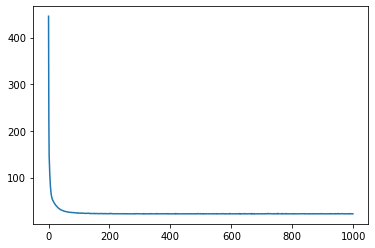

In [27]:
plt.plot( h.history['loss'])
plt.show()

In [28]:
w,b = model.get_weights()
w,b

(array([[ -9.62159   ],
        [  4.5733805 ],
        [  0.58683205],
        [  2.8817246 ],
        [ -8.590147  ],
        [ 19.840712  ],
        [  0.10225276],
        [-16.313534  ],
        [  7.046044  ],
        [ -6.4312496 ],
        [ -8.956466  ],
        [  3.682331  ],
        [-19.028923  ]], dtype=float32),
 array([26.632902], dtype=float32))

In [30]:
myarr = x.iloc[0].values
myarr

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [32]:
myarr.reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [34]:
xn = scalerF.transform( myarr.reshape(1,-1) )

In [35]:
result = model.predict( xn )
result

array([[29.989088]], dtype=float32)

## label 도 encoding해보기

In [36]:
scalerL = MinMaxScaler()
y_dataN = scalerL.fit_transform(y_data) 

In [37]:
dense = Dense(units =1 , input_dim = 13 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
h = model.fit(x_dataN, y_dataN ,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0542
Epoch 2/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0233
Epoch 3/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0151
Epoch 4/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0136
Epoch 5/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0187
Epoch 6/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0134
Epoch 7/1000
16/16 [==============================] - 0s 875us/step - loss: 0.0155
Epoch 8/1000
16/16 [==============================] - 0s 813us/step - loss: 0.0198
Epoch 9/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0136
Epoch 10/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0131
Epoch 11/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0161
Epoch 12/1000
16/16 [==============================] - 0s 938us/step - loss: 0.0128
E

16/16 [==============================] - 0s 688us/step - loss: 0.0148
Epoch 195/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0126
Epoch 196/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0180
Epoch 197/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0156
Epoch 198/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0131
Epoch 199/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 200/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 201/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 202/1000
16/16 [==============================] - 0s 938us/step - loss: 0.0159
Epoch 203/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 204/1000
16/16 [==============================] - 0s 938us/step - loss: 0.0215
Epoch 205/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0163
Epo

16/16 [==============================] - 0s 750us/step - loss: 0.0196
Epoch 387/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0171
Epoch 388/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0133
Epoch 389/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0164
Epoch 390/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0145
Epoch 391/1000
16/16 [==============================] - 0s 813us/step - loss: 0.0137
Epoch 392/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0161
Epoch 393/1000
16/16 [==============================] - 0s 687us/step - loss: 0.0193
Epoch 394/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0124
Epoch 395/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0118
Epoch 396/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0150
Epoch 397/1000
16/16 [==============================] - 0s 750us/step - loss: 0.

16/16 [==============================] - 0s 625us/step - loss: 0.0138
Epoch 579/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0163
Epoch 580/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0127
Epoch 581/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0141
Epoch 582/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0153
Epoch 583/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0152
Epoch 584/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0167
Epoch 585/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0167
Epoch 586/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0133
Epoch 587/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0128
Epoch 588/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0124
Epoch 589/1000
16/16 [==============================] - 0s 750us/step - loss: 0.

16/16 [==============================] - 0s 625us/step - loss: 0.0165
Epoch 771/1000
16/16 [==============================] - 0s 875us/step - loss: 0.0167
Epoch 772/1000
16/16 [==============================] - 0s 813us/step - loss: 0.0130
Epoch 773/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0137
Epoch 774/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0168
Epoch 775/1000
16/16 [==============================] - 0s 813us/step - loss: 0.0131
Epoch 776/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0197
Epoch 777/1000
16/16 [==============================] - 0s 750us/step - loss: 0.0190
Epoch 778/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0188
Epoch 779/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0158
Epoch 780/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0136
Epoch 781/1000
16/16 [==============================] - 0s 688us/step - loss: 0.

16/16 [==============================] - 0s 688us/step - loss: 0.0145
Epoch 963/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0124
Epoch 964/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0134
Epoch 965/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0124
Epoch 966/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0133
Epoch 967/1000
16/16 [==============================] - 0s 688us/step - loss: 0.0151
Epoch 968/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0214
Epoch 969/1000
16/16 [==============================] - 0s 625us/step - loss: 0.0129
Epoch 970/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0131
Epoch 971/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0135
Epoch 972/1000
16/16 [==============================] - 0s 563us/step - loss: 0.0151
Epoch 973/1000
16/16 [==============================] - 0s 563us/step - loss: 0.

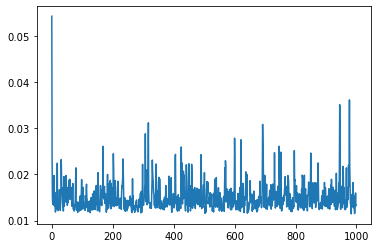

In [38]:
plt.plot( h.history['loss'])
plt.show()

In [42]:
result = model.predict( xn )
result

array([[0.5511248]], dtype=float32)

In [43]:
scalerL.inverse_transform( result)

array([[29.800615]], dtype=float32)

# standard scaler
$X_{new} = \frac{x-\mu}{\sigma}$

In [ ]:
stanscaler= StandardScaler()
x_scalered = scaler.fit_transform(x)

In [ ]:
x_scalered